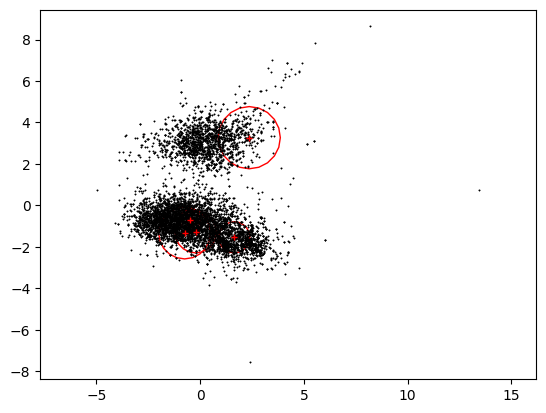

In [3]:
import os
os.chdir( "/home/lucasfuzato/CODING/WINE" )

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import numpy as np
# np.random.seed( 100 )

from sklearn.cluster import DBSCAN
from src.aux_fun import *
from itertools import product

X , norm_X , X_2d , attr = cluster_get_data()

#--------------------------------------------
# plotting the dataset
fig , ax = plt.subplots()
xs = X_2d[ 0 ]
ys = X_2d[ 1 ]
ax.plot( xs , ys , "*k" , markersize = .8 )
ax.axis('equal')

# -------------------------------------
# getting reasonable distances 
dists = np.arange( .5 , 1.6 , .25 )
for dist in dists:

    idx = np.random.randint( len( X ) )
    point = ( xs[ idx ] , ys[ idx ])
    circ = ptc.CirclePolygon( point , dist , fill = False , color = "red" )

    ax.add_patch( circ )
    ax.plot( xs[ idx ] , ys[ idx ] , "+r" , markersize = 5 )

plt.show()



In [4]:
dists = np.arange( 1.5 , 4.6 , .5 )
densities = np.array( [ 10 , 25 , 50 , 100 ] )
# densities *= 2

clist = []
for radius , density in product( dists , densities ):

    d = { "radius" : radius , "density" : density }
    
    DS = DBSCAN( eps = radius , min_samples = density )
    # DS.fit( X_2d.T )
    DS.fit( norm_X )
    labels = DS.labels_

    d[ "num_clusters" ] = len( set( labels ) - { -1 } )
    # print( d )
    
    where_out = ( labels == -1 )
    d[ "num_outliers" ] = sum( map( int , where_out ) )

    cls = d[ "num_clusters" ]
    if not cls:
        # clist.append( d )
        continue 

    soma , total = 0 , 0
    for i in range( cls ):

        where_cls = ( labels == i )
        cls_total = sum( map( int , where_out ) )
        total += cls_total

        cls_score = cluster_score( norm_X[ where_cls ] )
        soma += cls_score*cls_total
    d[ "mean_score" ] = soma/total

    clist.append( d )
df = pd.DataFrame( clist )

print( df )
print( df.loc[ df[ "num_outliers"] < 100 ] )   

    radius  density  num_clusters  num_outliers  mean_score
0      1.5       10             5           808   -1.613792
1      1.5       25             2          1231   -2.390419
2      1.5       50             3          1823   -1.799807
3      1.5      100             2          2856   -1.925690
4      2.0       10             2           226   -2.654336
5      2.0       25             2           334   -2.615768
6      2.0       50             2           412   -2.587734
7      2.0      100             2           551   -2.513573
8      2.5       10             3            85   -2.351106
9      2.5       25             2           127   -2.692323
10     2.5       50             2           167   -2.673374
11     2.5      100             2           194   -2.661560
12     3.0       10             2            38   -2.594159
13     3.0       25             1            64   -3.186714
14     3.0       50             1            70   -3.183765
15     3.0      100             1       

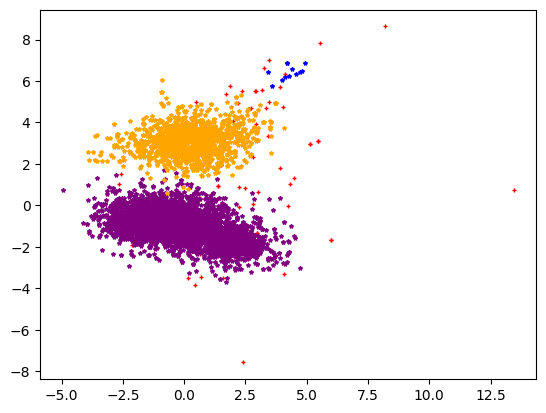

In [8]:
# only those with less than 100 outliers
acceptable = df.loc[ df[ "num_outliers"] < 100 ]

# finding the very best
acceptable.sort_values( "mean_score" , ascending = False )
best = acceptable.iloc[ 0 ]

# cluster criteria
radius = best[ "radius" ]
density = int( best[ "density" ] )

# Clustering again
DS = DBSCAN( eps = radius , min_samples = density )
DS.fit( norm_X )
labels = DS.labels_

# plotting the damn cluster
colors = [ "purple" , "orange" , "blue" , "pink" , "grey" ]
fig , ax = plt.subplots()
for i in range( -1 , int( best[ "num_clusters"] ) ):
    
    where = ( labels == i )
    x_where = xs[ where ]
    y_where = ys[ where ]

    # plotting outliers
    if i == -1:
        ax.plot( x_where , y_where , "+r" , markersize = 3 )

    # plotting clusters
    else:
        ax.plot( x_where , y_where , color = colors[ i ] ,  markersize = 3 , ls = "", marker = "*" )

plt.show()

        